In [138]:
#Import library
from qiskit import*
from collections import deque
from qiskit import Aer
from qiskit.visualization import plot_histogram

# Task1: Universal logic gates: AND(*), OR(+), NOT(!)

In [139]:
#AND in quantum logic gates: Toffli-level 2 gate (preserve input)
def AND_quantum(qc,a,b,c):
    qc.ccx(a,b,c)

In [140]:
#OR in quantum logic gates: 1 Toffli-level 2 gate and 2 CNOT (preserve input)
def OR_quantum(qc,a,b,c):
    qc.cx(a,c)
    qc.cx(b,c)
    qc.ccx(a,b,c)

In [141]:
#Not in quantum logic gate: CNOT gate (preserve input)
def NOT_quantum(qc,a,c):
    qc.x(c)
    qc.cx(a,c)

In [142]:
# From classical boolean logic fuction to quantum circuit
def qc_from_boolean_fuc(string):
    stack = [] #Create a stack
    k = 1 # Create counter to browser through the string
    n = 0 # number of input(input_qubit)
    a = 0 # number of ancilla(qubit)
    counter = 0 #Count the number of qubit
    stack.append(string[0])

    #**Create quantum circuit with n+a qubit**#
    for i in range (len(string)):
        if(string[i].isnumeric()):
            n=n+1
        if(string[i] == "+" or string[i] == "*" or string[i] == "!"):
            a=a+1
    q_n = QuantumRegister(n,name ='input')
    q_a = QuantumRegister(a,name ='ancilla')

    qc = QuantumCircuit(q_n,q_a)
    
    #*We will use stack to handle the string*#
    ancilla = n
    while(len(stack) != 0):
        if( k >= len(string)):
            break    
        #print(stack) #use to debug
        #*If the char is numeric push the char(with new index corresponding to qubit_index) to stack
        if(string[k].isnumeric() == True): 
            x = str(counter)
            stack.append(x)
            counter=counter+1
        else:
            stack.append(string[k])
        #*We handle the string by checking ')', if we meet ')' just pop char from the stack then handle it by using quantum func above
        if(stack[len(stack)-1] == ")"):
            #print(stack) #use to debug
            stack.pop()
            a = int(stack.pop())
            b = stack.pop()
            if (b != "!"):
                c = int(stack.pop())
            stack.pop()
            if(b == "!"):
                NOT_quantum(qc,a,ancilla)
                qc.barrier()
                stack.append(str(ancilla))
            elif (b == "*"):
                AND_quantum(qc,c,a,ancilla)
                qc.barrier()
                stack.append(str(ancilla))
            else:
                OR_quantum(qc,c,a,ancilla)
                qc.barrier()
                stack.append(str(ancilla))
            ancilla +=1
            k += 1
        else:
            k = k+1
    return qc

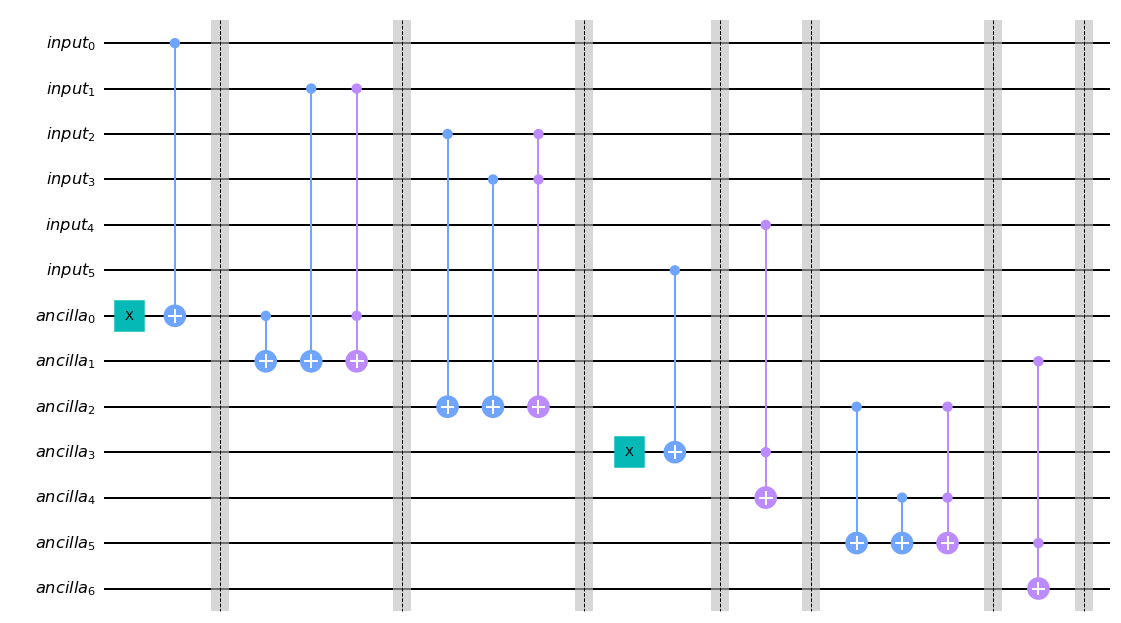

In [143]:
#For clarification, each operator, even ! must be contain inside a bracket "()". See example below
string = "(((!1)+2)*((4+5)+(6*(!7))))"
qc = qc_from_boolean_fuc(string)
qc.draw('mpl')
# The last qubit is the result bit.

# Task 2: Predict truth table

In [144]:
def qc_from_boolean_fuc_allpos(string):
    stack = [] #Create a stack
    k = 1 # Create counter to browser through the string
    n = 0 # number of input(input_qubit)
    a = 0 # number of ancilla(qubit)
    counter = 0 #Count the number of qubit
    stack.append(string[0])

    #**Create quantum circuit with n+a qubit**#
    for i in range (len(string)):
        if(string[i].isnumeric()):
            n=n+1
        if(string[i] == "+" or string[i] == "*" or string[i] == "!"):
            a=a+1
    q_n = QuantumRegister(n,name ='input')
    q_a = QuantumRegister(a,name ='ancilla')
    out = ClassicalRegister(n+1, name = 'output')
    
    qc = QuantumCircuit(q_n,q_a,out)
    #Create super position for all input
    qc.h(q_n)
    qc.barrier()
    #*We will use stack to handle the string*#
    ancilla = n
    while(len(stack) != 0):
        if( k >= len(string)):
            break    
        #print(stack) #use to debug
        #*If the char is numeric push the char(with new index corresponding to qubit_index) to stack
        if(string[k].isnumeric() == True): 
            x = str(counter)
            stack.append(x)
            counter=counter+1
        else:
            stack.append(string[k])
        #*We handle the string by checking ')', if we meet ')' just pop char from the stack then handle it by using quantum func above
        if(stack[len(stack)-1] == ")"):
            #print(stack) #use to debug
            stack.pop()
            a = int(stack.pop())
            b = stack.pop()
            if (b != "!"):
                c = int(stack.pop())
            stack.pop()
            if(b == "!"):
                NOT_quantum(qc,a,ancilla)
                qc.barrier()
                stack.append(str(ancilla))
            elif (b == "*"):
                AND_quantum(qc,c,a,ancilla)
                qc.barrier()
                stack.append(str(ancilla))
            else:
                OR_quantum(qc,c,a,ancilla)
                qc.barrier()
                stack.append(str(ancilla))
            ancilla +=1
            k += 1
        else:
            k = k+1
    #Measurement for all input
    for i in range(n):
        qc.measure(i,i)
    qc.measure(ancilla-1,n)
    return qc

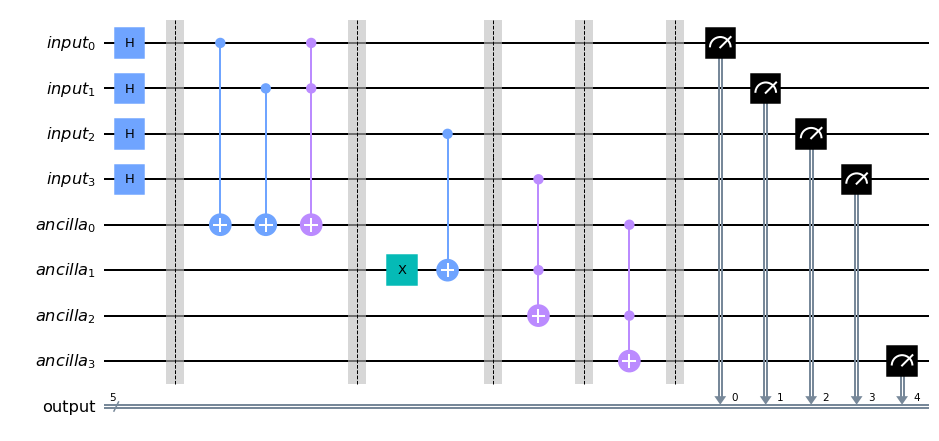

In [145]:
#For clarification, each operator, even ! must be contain inside a bracket "()". See example below
string = "((1+2)*((!3)*4))"
qc = qc_from_boolean_fuc_allpos(string)
qc.draw('mpl')
# The last qubit is the result bit.

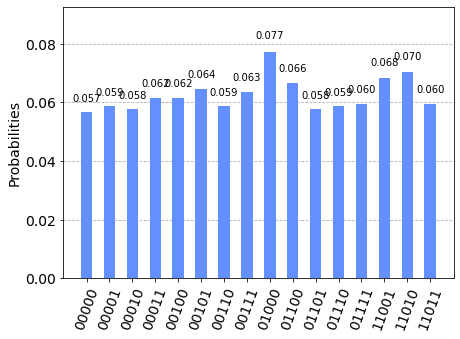

In [146]:
backend = Aer.get_backend('qasm_simulator')
sim = execute(qc, backend)
result = sim.result()
counts = result.get_counts()
plot_histogram(counts)
#Most significant bit is the result bit